In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd  
from sklearn.datasets import fetch_openml

In [4]:
data_x, data_y = fetch_openml(name="boston", version=1, as_frame=True, return_X_y=True, parser="pandas")

In [5]:
from sklearn.model_selection import train_test_split
 
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=1001)

In [7]:
# 创建CART回归树
dtr = DecisionTreeRegressor()

# 拟合构造CART回归树
dtr.fit(train_x, train_y)

# 预测测试集中的房价
predict_price = dtr.predict(test_x)

# 测试集的结果评价
print('回归树准确率:', dtr.score(test_x, test_y)) 
print('回归树r2_score:', r2_score(test_y, predict_price)) 
print('回归树二乘偏差均值:', mean_squared_error(test_y, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_y, predict_price))

回归树准确率: 0.7032769036733362
回归树r2_score: 0.7032769036733362
回归树二乘偏差均值: 29.91343137254902
回归树绝对值偏差均值: 3.2754901960784317


Text(0.5, 1.0, 'Feature Importance Ranking')

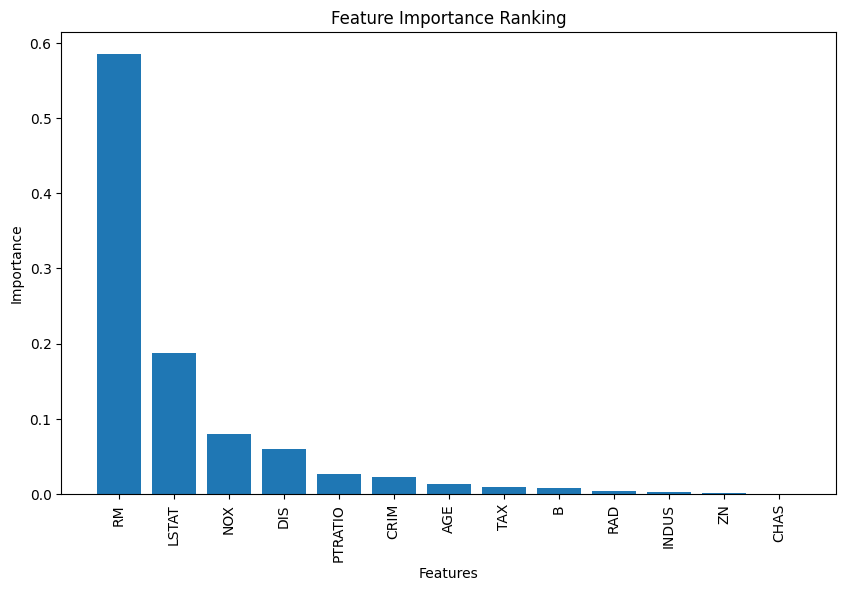

In [8]:
import matplotlib.pyplot as plt

# 提取特征重要性
importance = dtr.feature_importances_

# 将特征重要性与特征名称对应起来
feature_names = list(train_x.columns)

# 将特征重要性进行排序
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# 绘制特征重要性排行图
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), sorted_importance, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')